# Google Apps 商店的数据分析

## 简介

数据集(googleplaystore.csv)包含了Google Play Store中 10k+ 应用软件的信息。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分。

数据集中的变量及说明：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。
```

## 提出问题

**问题**：
- 什么类型（category）的App平均评分高？
- App的大小（size）和评分是否有关？

**答案**：
- 教育（Education）类App平均评分最高。
- App的大小（size）和评分的关系为：较弱的正相关。

## 数据评估和清理
### 数据评估

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_softwares = pd.read_csv('googleplaystore.csv')

In [3]:
df_softwares.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_softwares.shape

(10841, 13)

In [5]:
df_softwares.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df_softwares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df_softwares.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
for _ in df_softwares.columns:
    print('*'*10, _, '*'*10)
    print(df_softwares[_].unique())
    print()

********** App **********
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

********** Category **********
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

********** Rating **********
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 

发现问题：
- 列名不是全部小写而且有空格
- 存在空值(rating)
- 部分列（size）数据类型不合适

与问题相关/会对分析结果造成影响的列：
- category
- size
- rating

其他列存在的问题忽略。

### 数据清理：
1. 列名的所有字母小写，并且用下划线替换空格。
1. 检查空值并且fillna（“rating”列）
1. 去重
1. 修改“size”列的数据类型
1. 通过groupby，计算每个类型（category）的评分（rating）的平均值。

In [9]:
df_softwares = df_softwares.rename(columns = lambda x: x.lower().replace(' ', '_'))

以下操作为：检查空值并且fillna（“rating”列）

In [10]:
df_softwares.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [11]:
df_softwares.rating = df_softwares.rating.fillna(0)

In [12]:
# 确认fillna是否生效
df_softwares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
app               10841 non-null object
category          10841 non-null object
rating            10841 non-null float64
reviews           10841 non-null object
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10840 non-null object
genres            10841 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


以下操作为：去重

In [13]:
df_softwares[df_softwares.duplicated()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [14]:
df_softwares = df_softwares.drop_duplicates()

In [15]:
df_softwares[df_softwares.duplicated()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


以下操作为：转换“size”列的数据类型。

In [16]:
temp =  df_softwares['size'].apply(lambda x: float(x[:-1]) * 1024 if x[-1] == 'M' else float(x[:-1]) if x[-1] == 'K' else 0)
df_softwares['size'] = temp.astype(float)

In [17]:
# 确认修改是否生效
df_softwares.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
app               10358 non-null object
category          10358 non-null object
rating            10358 non-null float64
reviews           10358 non-null object
size              10358 non-null float64
installs          10358 non-null object
type              10357 non-null object
price             10358 non-null object
content_rating    10357 non-null object
genres            10358 non-null object
last_updated      10358 non-null object
current_ver       10350 non-null object
android_ver       10355 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


以下操作为：通过groupby，计算每个类型（category）的评分（rating）的平均值。

In [18]:
gp = df_softwares.groupby('category', as_index = False).mean()[['category', 'rating', 'size']].copy()
gp.head() 

,category,rating,size
0,1.9,19.000000,0.000000
1,ART_AND_DESIGN,4.156923,12083.200000
2,AUTO_AND_VEHICLES,3.598824,18091.068235
3,BEAUTY,3.390566,12527.577358
4,BOOKS_AND_REFERENCE,3.345652,11486.163478


In [19]:
gp.rating.describe()

count    34.000000
mean      4.039381
std       2.666318
min       2.594145
25%       3.403608
50%       3.571505
75%       3.804304
max      19.000000
Name: rating, dtype: float64

In [20]:
gp = gp.sort_values('rating', ascending=False)

以下操作为：处理“category”列：删除异常值（“1.9”），

In [21]:
gp.category.unique()

array(['1.9', 'EDUCATION', 'ART_AND_DESIGN', 'ENTERTAINMENT', 'GAME',
       'COMICS', 'PHOTOGRAPHY', 'WEATHER', 'SHOPPING', 'VIDEO_PLAYERS',
       'SOCIAL', 'FAMILY', 'MAPS_AND_NAVIGATION', 'HEALTH_AND_FITNESS',
       'FINANCE', 'AUTO_AND_VEHICLES', 'PARENTING', 'FOOD_AND_DRINK',
       'TRAVEL_AND_LOCAL', 'HOUSE_AND_HOME', 'TOOLS', 'COMMUNICATION',
       'PERSONALIZATION', 'PRODUCTIVITY', 'SPORTS', 'BEAUTY', 'LIFESTYLE',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'DATING',
       'LIBRARIES_AND_DEMO', 'EVENTS', 'MEDICAL', 'BUSINESS'],
      dtype=object)

In [22]:
gp = gp[gp.category != '1.9']

## 数据探索分析

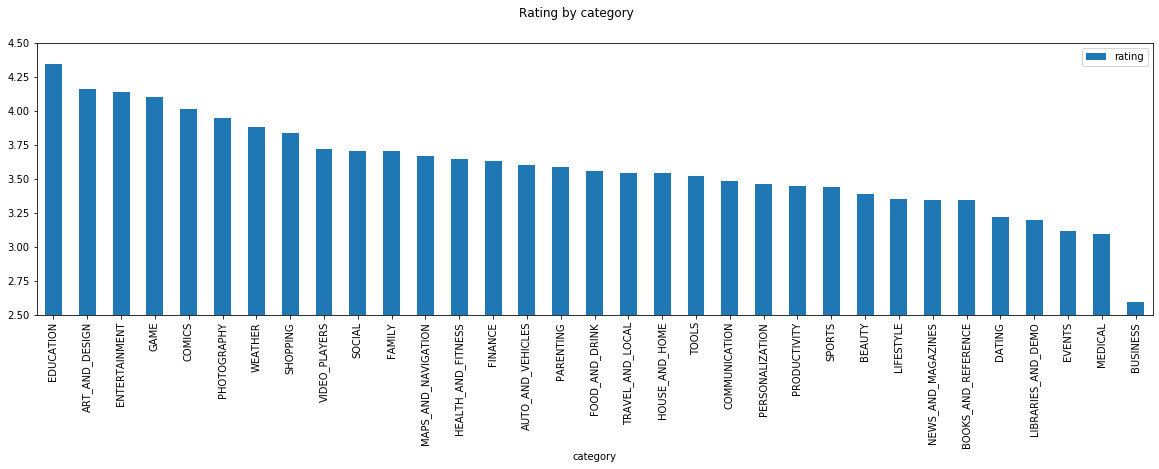

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
gp.plot(x = 'category', y = 'rating', ax = ax, kind='bar')
ax.set_ylim(bottom = 2.5, top = 4.5, auto =True)
plt.suptitle('Rating by category');

从图中可知，不同类型的App平均评分差异较大，其中最高的是教育（Education）类。

In [24]:
df_softwares = df_softwares[df_softwares.rating <= 5.0] 
df_softwares = df_softwares[df_softwares.rating > 0] 

第一次可视化后，发现“0”和“大于5”的评分为异常值，从数据集中删除，重新可视化。

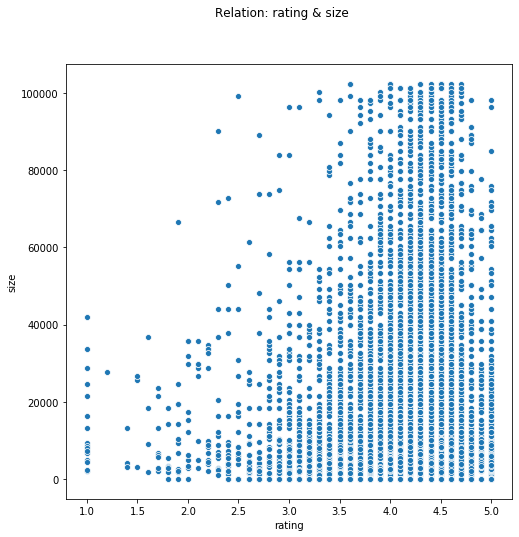

In [25]:
fig2, ax2 = plt.subplots(figsize = (8, 8))
ax2 = sns.scatterplot(x="rating", y="size", data=df_softwares)
plt.suptitle('Relation: rating & size');

从图中可知App的大小（size）和评分的关系为：较弱的正相关。

## 得出结论
**问题**：
- 什么类型（category）的App平均评分高？
- App的大小（size）和评分是否有关？

**答案**：
- 教育（Education）类App平均评分最高。
- App的大小（size）和评分的关系为：较弱的正相关。